In [14]:
import vtk
def write_rectilinear_vtk(X, Y, data_dict, filename):
    # Create the rectilinear grid
    grid = vtk.vtkRectilinearGrid()
    grid.SetDimensions(len(X), len(Y), 1)

    # Set the coordinates for the grid
    x_coords = vtk.vtkDoubleArray()
    y_coords = vtk.vtkDoubleArray()
    z_coords = vtk.vtkDoubleArray()

    for i in range(len(X)):
        x_coords.InsertNextValue(X[i])
    for j in range(len(Y)):
        y_coords.InsertNextValue(Y[j])
    z_coords.InsertNextValue(0)  # Since it's a 2D grid, Z is constant

    grid.SetXCoordinates(x_coords)
    grid.SetYCoordinates(y_coords)
    grid.SetZCoordinates(z_coords)

    # Add each data array to the grid
    for name, data in data_dict.items():
        data_array = vtk.vtkDoubleArray()
        data_array.SetNumberOfComponents(1)
        data_array.SetName(name)

        for value in data.flatten():
            data_array.InsertNextValue(value)

        grid.GetPointData().AddArray(data_array)

    # Write the grid to a VTK file
    writer = vtk.vtkRectilinearGridWriter()
    writer.SetFileName(filename)
    writer.SetInputData(grid)
    writer.Write()

    print(f"VTK file '{filename}' written successfully.")

../profiles\meanprofile0.csv
../profiles\meanprofile1.csv
../profiles\meanprofile2.csv
../profiles\meanprofile3.csv
../profiles\meanprofile4.csv
../profiles\meanprofile5.csv
../profiles\meanprofile6.csv
../profiles\meanprofile7.csv
../profiles\meanprofile8.csv
../profiles\meanprofile9.csv
../profiles\meanprofile10.csv
../profiles\meanprofile11.csv
../profiles\meanprofile12.csv
../profiles\meanprofile13.csv
../profiles\meanprofile14.csv
../profiles\meanprofile15.csv
../profiles\meanprofile16.csv
../profiles\meanprofile17.csv
../profiles\meanprofile18.csv
../profiles\meanprofile19.csv
../profiles\meanprofile20.csv
../profiles\meanprofile21.csv
../profiles\meanprofile22.csv
../profiles\meanprofile23.csv
../profiles\meanprofile24.csv
../profiles\meanprofile25.csv
../profiles\meanprofile26.csv
../profiles\meanprofile27.csv
../profiles\meanprofile28.csv
../profiles\meanprofile29.csv
../profiles\meanprofile30.csv
../profiles\meanprofile31.csv
../profiles\meanprofile32.csv
../profiles\meanprof

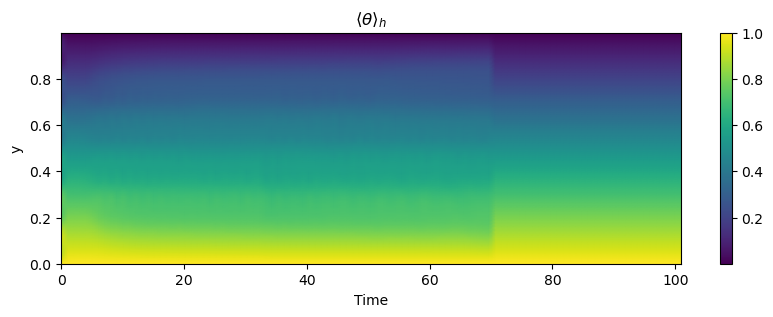

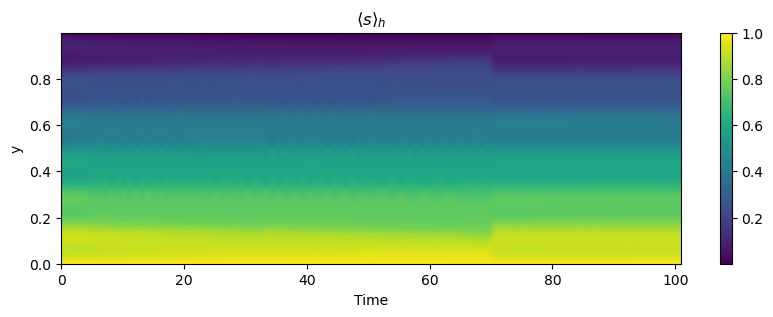

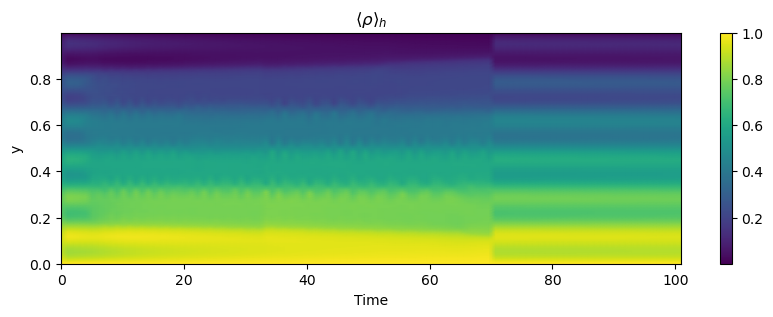

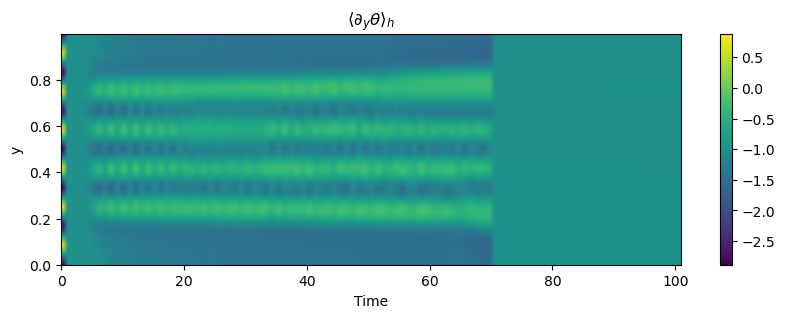

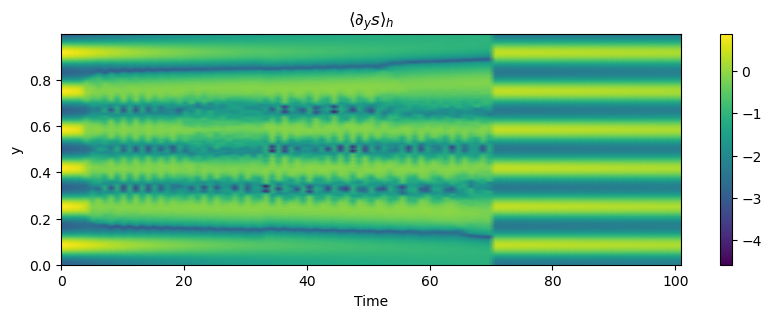

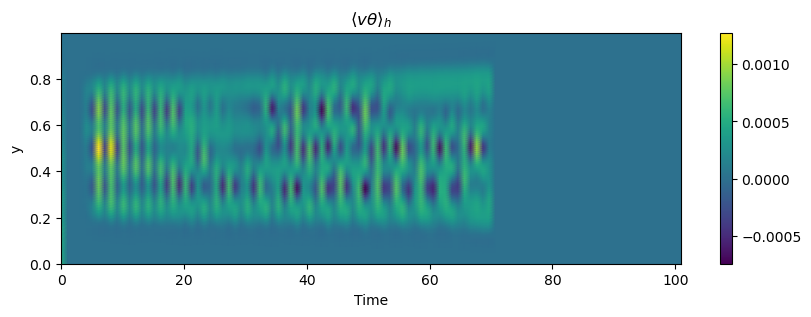

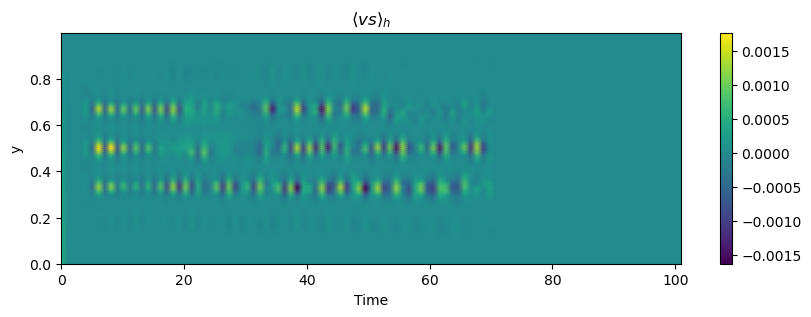

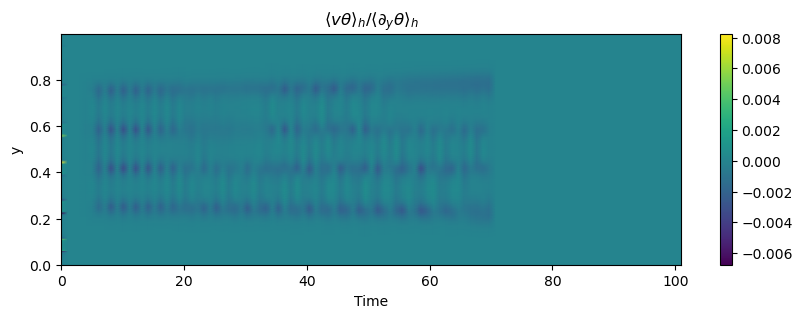

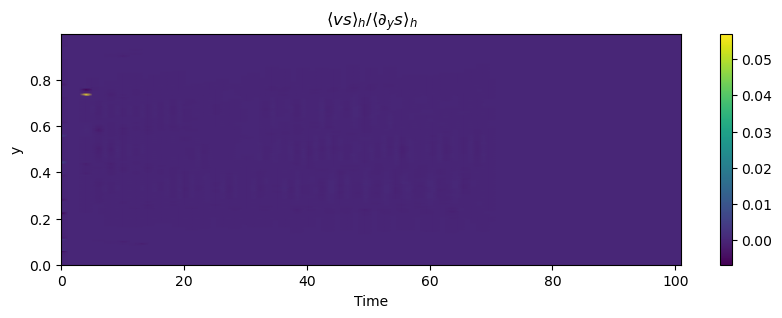

In [95]:
# to run: python3 plot_meanprofiles.py
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re

def numerical_sort(value):
    numbers = re.findall(r'\d+', value)
    return int(numbers[0]) if numbers else 0

# Get the list of all CSV files in the directory
file_list = glob.glob('../profiles/meanprofile*.csv')
file_list.sort(key=numerical_sort)
nstep = len(file_list)

# Initialize an empty list to store the dataframes
T_mean = []
S_mean = []
T_gradient = []
S_gradient = []
T_flux = []
S_flux = []

y = []

# Loop through each file and read it into a dataframe
for file in file_list:
    print(file)
    df = pd.read_csv(file, skiprows=1)
    array = df.values
    y = array[:,0]
    
    T_mean.append(array[:,1])
    S_mean.append(array[:,2])
    T_gradient.append(array[:,3])
    S_gradient.append(array[:,4])
    T_flux.append(array[:,5])
    S_flux.append(array[:,6])
    
T_mean = np.array(T_mean)
S_mean = np.array(S_mean)
T_gradient = np.array(T_gradient)
S_gradient = np.array(S_gradient)
T_flux = np.array(T_flux)
S_flux = np.array(S_flux)

Rp = 0.5
Dens_mean = (S_mean-Rp*T_mean)/(1-Rp)
T_turbDiff = T_flux / T_gradient               # turbulent diffusivity
S_turbDiff = S_flux / S_gradient               # turbulent diffusivity

t = np.linspace(0, nstep, nstep) 

data_dict = {"T_mean": T_mean,
             "S_mean": S_mean,
             "T_gradient": T_gradient,
             "S_gradient": S_gradient,
             "T_flux": T_flux,
             "S_flux": T_flux}


X, Y = np.meshgrid(t, y)

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,T_mean.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle\theta\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,S_mean.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle s\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,Dens_mean.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle\rho\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,T_gradient.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle\partial_y \theta\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,S_gradient.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle\partial_y s\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,T_flux.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle v \theta\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,S_flux.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle v s\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,T_turbDiff.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle v \theta\rangle_h / \langle\partial_y \theta\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,S_turbDiff.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle v s\rangle_h / \langle\partial_y s\rangle_h$')
plt.show()

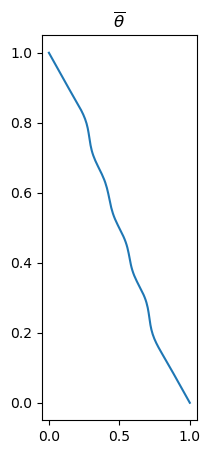

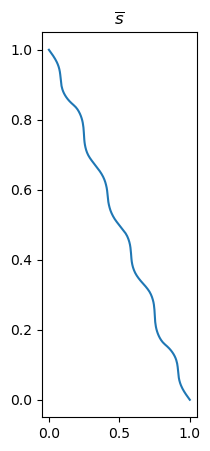

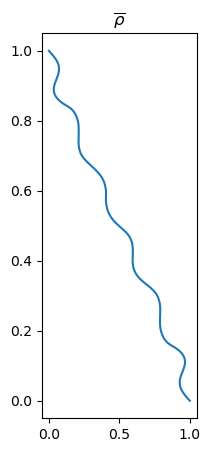

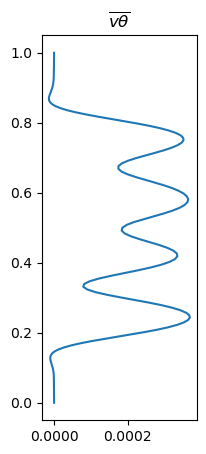

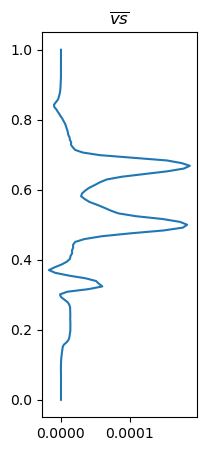

In [98]:
startstep, endstep = 10, 30
mean_T = np.mean(T_mean[startstep:endstep,:], axis=-2)
mean_S = np.mean(S_mean[startstep:endstep,:], axis=-2)
mean_Dens = np.mean(Dens_mean[startstep:endstep,:], axis=-2)
mean_T_flux = np.mean(T_flux[startstep:endstep,:], axis=-2)
mean_S_flux = np.mean(S_flux[startstep:endstep,:], axis=-2)

plt.figure(figsize=(2, 5))
plt.plot(mean_T,y)
plt.title(r'$\overline{\theta}$')
plt.show()

plt.figure(figsize=(2, 5))
plt.plot(mean_S,y)
plt.title(r'$\overline{s}$')
plt.show()

plt.figure(figsize=(2, 5))
plt.plot(mean_Dens,y)
plt.title(r'$\overline{\rho}$')
plt.show()

plt.figure(figsize=(2, 5))
plt.plot(mean_T_flux,y)
plt.title(r'$\overline{v \theta}$')
plt.show()

plt.figure(figsize=(2, 5))
plt.plot(mean_S_flux,y)
plt.title(r'$\overline{v s}$')
plt.show()

In [ ]:
import sympy as sp
import numpy as np

# Define the variables
y, R = sp.symbols('y R')

# Define the function
f = -1/2 * (sp.tanh(R*(y - 1/3)) + sp.tanh(R*(y + 1/3)))
# f = sp.tanh(R*(y - 1/3))
# f = sp.tanh(R*(y + 1/3))
# f = (sp.tanh(R*(y - 1/3)) + sp.tanh(R*(y + 1/3)))
# Expand the function using Taylor series
f_approx = sp.expand(f.series(y, 0, 4))

print(f_approx)

-1.0*R*y + 1.0*R*y*tanh(0.333333333333333*R)**2 + 0.333333333333333*R**3*y**3 - 1.33333333333333*R**3*y**3*tanh(0.333333333333333*R)**2 + 1.0*R**3*y**3*tanh(0.333333333333333*R)**4 + O(y**4)


C:\Users\jms24002\AppData\Local\Temp\ipykernel_33152\1085077282.py:24: UserWarning:

The following kwargs were not used by contour: 'shading'



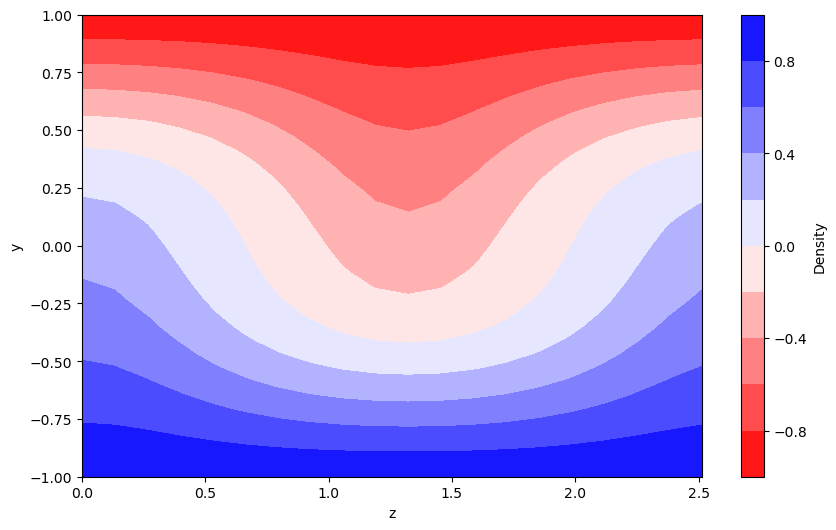

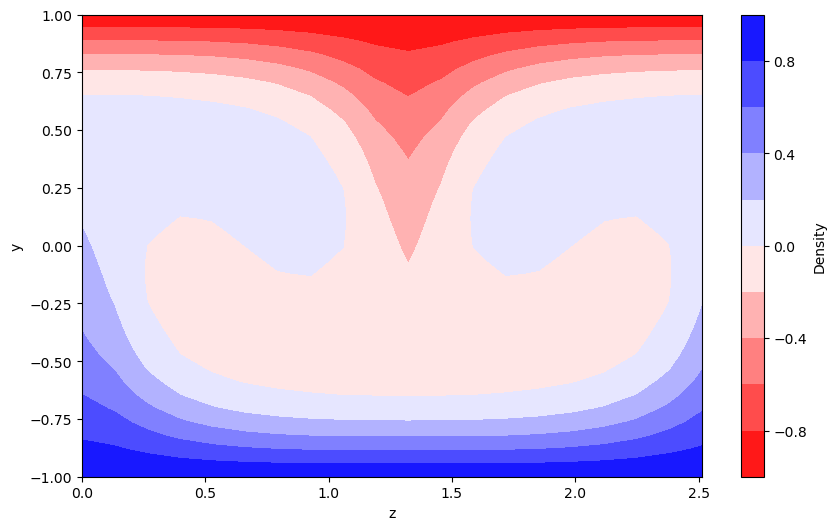

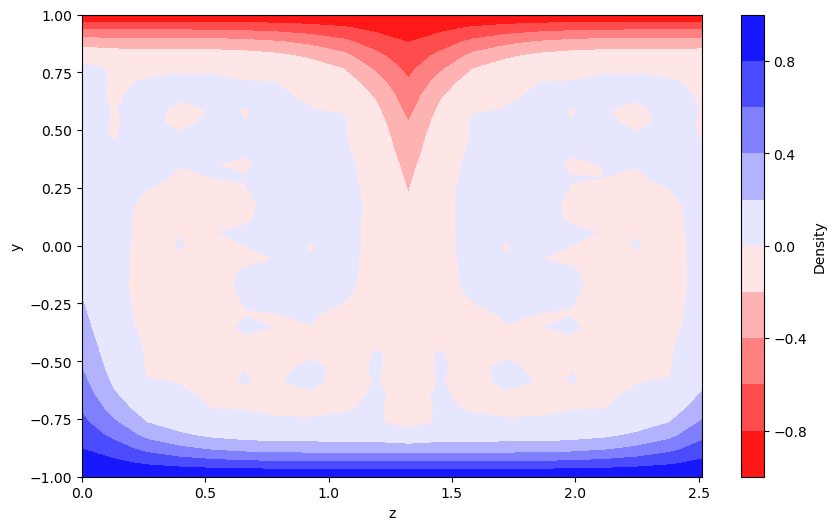

In [92]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Function to read 3D velocity data from a .nc file and compute streamwise-averaged velocity
def compute_streamwise_averaged_field(file_path):
    # Open the .nc file
    ds = nc.Dataset(file_path)
    
    # Assuming the velocity data is stored in a variable named 'velocity'
    # and has dimensions (time, z, y, x)
    scalar = ds.variables['Component_0'][:]
    
    # Compute the streamwise-averaged velocity (average along the x-axis)
    streamwise_averaged_scalar = np.mean(scalar, axis=-1)
    
    return streamwise_averaged_scalar

# Function to plot the streamwise-averaged velocity in a 2D surface figure
def plot_streamwise_averaged_field(x,y,f):
    X, Y = np.meshgrid(x, y)
    plt.figure(figsize=(10, 6))
    # plt.pcolormesh(X,Y,f, cmap=plt.cm.bwr.reversed(),shading='gouraud', vmin = np.min(f), vmax = np.max(f))
    plt.contourf(X,Y,f, cmap=plt.cm.bwr.reversed(),shading='gouraud',levels=11,  vmin = np.min(f), vmax = np.max(f))
    plt.colorbar(label='Density')
    plt.xlabel('z')
    plt.ylabel('y')
    # plt.title('Streamwise-Averaged Density')
    plt.show()

def ypoints(a, b, Ny):
    ypts = np.zeros(Ny)
    c = 0.5 * (b + a)
    r = 0.5 * (b - a)
    piN = np.pi / (Ny - 1)
    for i in range(Ny):
        ypts[i] = c + r * np.cos(piN * i)
    return ypts

def plot_go(x,y,f):
    import plotly.graph_objects as go
    fig = go.Figure(data =
        go.Contour(
            z=f,
            x=x, # horizontal axis
            y=y, # vertical axis
            contours=dict(
                coloring ='bwr',
                start=np.min(f),
                end=np.max(f),
                size=(np.max(f)-np.min(f))/10,
            )
            
        ))
    # Update the layout to set the size of the figure
    fig.update_layout(
        width=800,  # Set the width of the figure
        height=600  # Set the height of the figure
    )
    fig.show()

def smooth(x,y,z):
    from scipy.interpolate import griddata
    # Create a finer grid for interpolation
    scale = 1
    X, Y = np.meshgrid(x, y)
    x_fine = np.linspace(np.min(x), np.max(x), scale*len(x))
    y_fine = np.linspace(np.min(y), np.max(y), scale*len(y))
    X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

    # Interpolate the data onto the finer grid
    Z_fine = griddata((X.flatten(), Y.flatten()), z.flatten(), (X_fine, Y_fine), method='cubic')
    return x_fine,y_fine,Z_fine

# Path to the .nc file
file_path = '../equilibria_W03cell/eq1/tbest_Pr1_Ri0.nc'
# Compute streamwise-averaged velocity
streamwise_averaged_density = compute_streamwise_averaged_field(file_path)
y = ypoints(-1,1,streamwise_averaged_density.shape[1])
z = np.linspace(0, 2*np.pi/2.5, streamwise_averaged_density.shape[0])
streamwise_averaged_totdens = streamwise_averaged_density - y
[fine_z,file_y,fine_dens] = smooth(z,y,streamwise_averaged_totdens.T)
# Plot the streamwise-averaged velocity
plot_streamwise_averaged_field(fine_z,file_y,fine_dens)

# Path to the .nc file
file_path = '../equilibria_W03cell/eq1/tbest_Pr10_Ri0.nc'
# Compute streamwise-averaged velocity
streamwise_averaged_density = compute_streamwise_averaged_field(file_path)
y = ypoints(-1,1,streamwise_averaged_density.shape[1])
z = np.linspace(0, 2*np.pi/2.5, streamwise_averaged_density.shape[0])
streamwise_averaged_totdens = streamwise_averaged_density - y
# Plot the streamwise-averaged velocity
[fine_z,file_y,fine_dens] = smooth(z,y,streamwise_averaged_totdens.T)
# Plot the streamwise-averaged velocity
plot_streamwise_averaged_field(fine_z,file_y,fine_dens)

# Path to the .nc file
file_path = '../equilibria_W03cell/eq1/tbest_Pr70_Ri0.nc'
# Compute streamwise-averaged velocity
streamwise_averaged_density = compute_streamwise_averaged_field(file_path)
y = ypoints(-1,1,streamwise_averaged_density.shape[1])
z = np.linspace(0, 2*np.pi/2.5, streamwise_averaged_density.shape[0])
streamwise_averaged_totdens = streamwise_averaged_density - y
# Plot the streamwise-averaged velocity
[fine_z,file_y,fine_dens] = smooth(z,y,streamwise_averaged_totdens.T)
# Plot the streamwise-averaged velocity
plot_streamwise_averaged_field(fine_z,file_y,fine_dens)

C:\Users\jms24002\AppData\Local\Temp\ipykernel_33152\1085077282.py:24: UserWarning:

The following kwargs were not used by contour: 'shading'



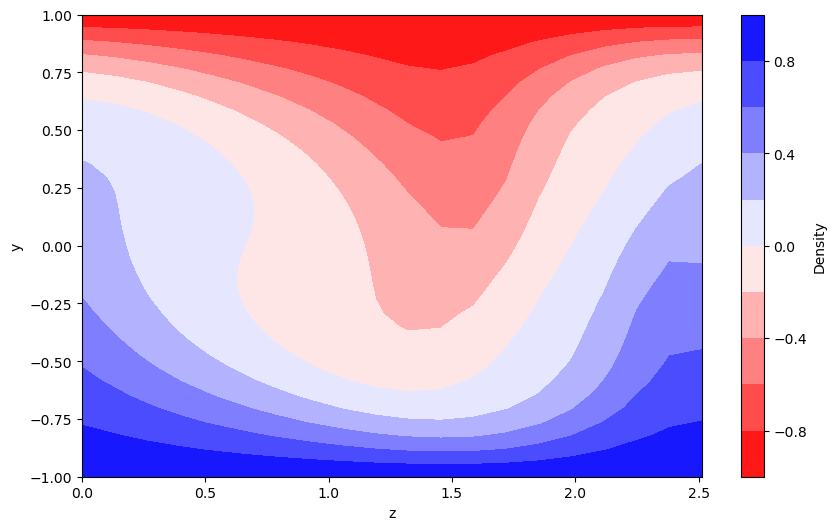

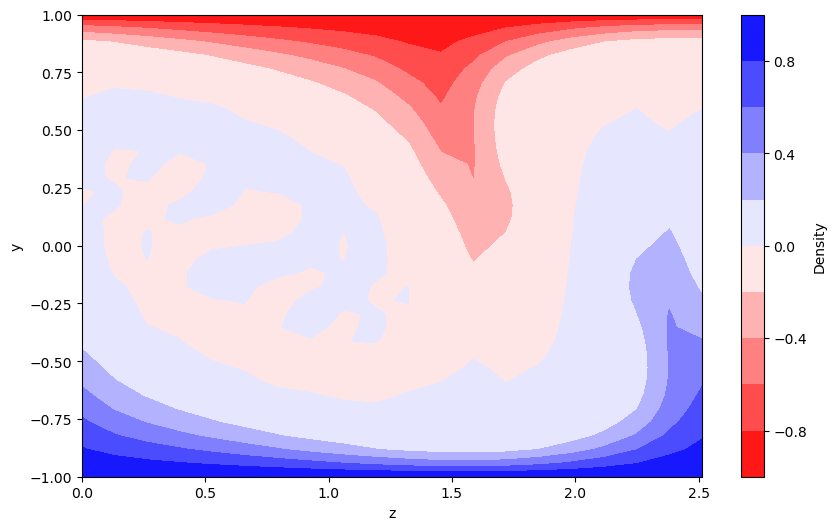

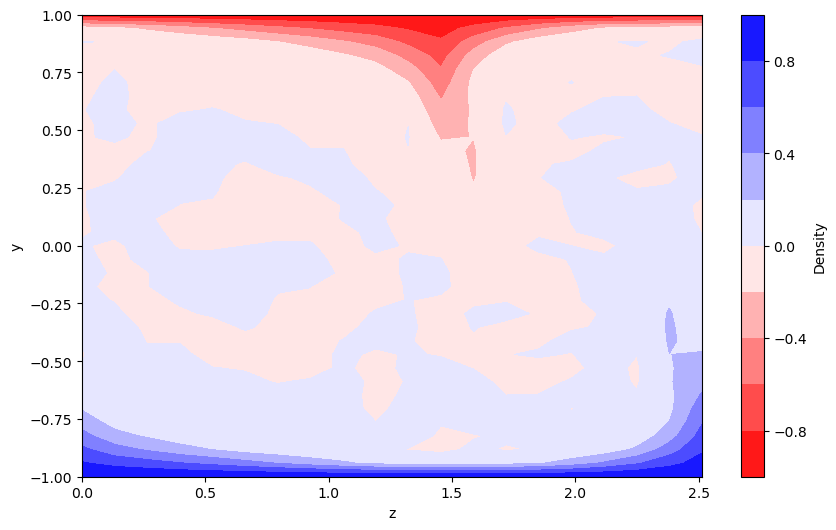

In [94]:
# Path to the .nc file
file_path = '../equilibria_W03cell/eq10/tbest_Pr1_Ri0.nc'
# Compute streamwise-averaged velocity
streamwise_averaged_density = compute_streamwise_averaged_field(file_path)
y = ypoints(-1,1,streamwise_averaged_density.shape[1])
z = np.linspace(0, 2*np.pi/2.5, streamwise_averaged_density.shape[0])
streamwise_averaged_totdens = streamwise_averaged_density - y
[fine_z,file_y,fine_dens] = smooth(z,y,streamwise_averaged_totdens.T)
# Plot the streamwise-averaged velocity
plot_streamwise_averaged_field(fine_z,file_y,fine_dens)

# Path to the .nc file
file_path = '../equilibria_W03cell/eq10/tbest_Pr10_Ri0.nc'
# Compute streamwise-averaged velocity
streamwise_averaged_density = compute_streamwise_averaged_field(file_path)
y = ypoints(-1,1,streamwise_averaged_density.shape[1])
z = np.linspace(0, 2*np.pi/2.5, streamwise_averaged_density.shape[0])
streamwise_averaged_totdens = streamwise_averaged_density - y
# Plot the streamwise-averaged velocity
[fine_z,file_y,fine_dens] = smooth(z,y,streamwise_averaged_totdens.T)
# Plot the streamwise-averaged velocity
plot_streamwise_averaged_field(fine_z,file_y,fine_dens)

# Path to the .nc file
file_path = '../equilibria_W03cell/eq10/tbest_Pr70_Ri0.nc'
# Compute streamwise-averaged velocity
streamwise_averaged_density = compute_streamwise_averaged_field(file_path)
y = ypoints(-1,1,streamwise_averaged_density.shape[1])
z = np.linspace(0, 2*np.pi/2.5, streamwise_averaged_density.shape[0])
streamwise_averaged_totdens = streamwise_averaged_density - y
# Plot the streamwise-averaged velocity
[fine_z,file_y,fine_dens] = smooth(z,y,streamwise_averaged_totdens.T)
# Plot the streamwise-averaged velocity
plot_streamwise_averaged_field(fine_z,file_y,fine_dens)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
    ))
fig.show()

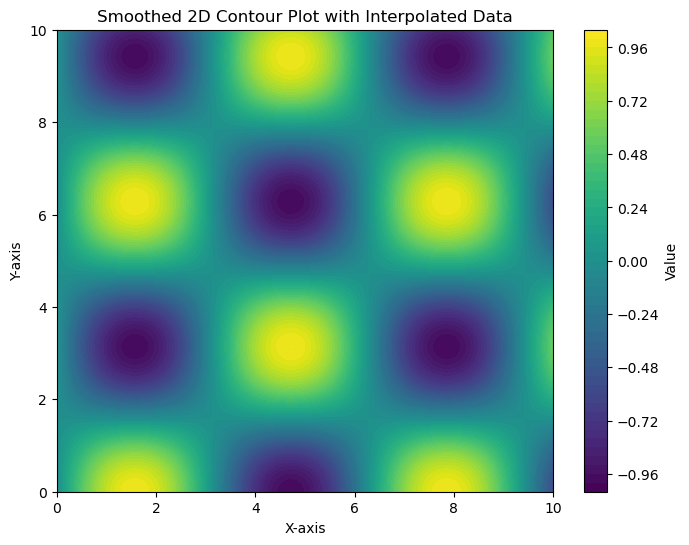

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Generate some example data
n = 100  # Original grid size
x = np.linspace(0, 10, n)
y = np.linspace(0, 10, n)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

# Create a finer grid for interpolation
n_fine = 300  # Finer grid size
x_fine = np.linspace(0, 10, n_fine)
y_fine = np.linspace(0, 10, n_fine)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

# Interpolate the data onto the finer grid
Z_fine = griddata((X.flatten(), Y.flatten()), Z.flatten(), (X_fine, Y_fine), method='cubic')

# Create a 2D contour plot with the interpolated data
plt.figure(figsize=(8, 6))
contour = plt.contourf(X_fine, Y_fine, Z_fine, levels=50, cmap='viridis')
plt.colorbar(contour, label='Value')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Smoothed 2D Contour Plot with Interpolated Data')
plt.show()
